<IPython.core.display.Javascript object>


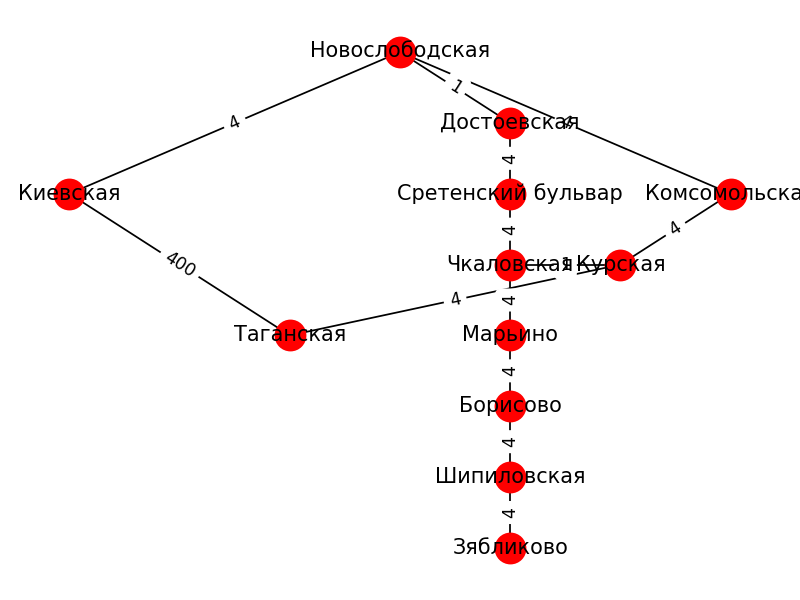

['Чкаловская', 'Курская', 'Комсомольская', 'Новослободская', 'Киевская']

In [217]:
#!/usr/bin/python
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook

def seed_graph():
    # salade
    G=nx.Graph()
    G.add_node('Зябликово'            ,pos=(1.0, 0.1))
    G.add_node('Шипиловская'          ,pos=(1.0, 0.2))
    G.add_node('Борисово'             ,pos=(1.0, 0.3))
    G.add_node('Марьино'              ,pos=(1.0, 0.4))
    G.add_node('Чкаловская'           ,pos=(1.0, 0.5))
    G.add_node('Сретенский бульвар'   ,pos=(1.0, 0.6))
    G.add_node('Достоевская'          ,pos=(1.0, 0.7))
    # circle
    G.add_node('Курская'              ,pos=(1.05, 0.5))
    G.add_node('Таганская'            ,pos=(0.9, 0.4))
    G.add_node('Киевская'             ,pos=(0.8, 0.6))
    G.add_node('Комсомольская'        ,pos=(1.1, 0.6))
    G.add_node('Новослободская'       ,pos=(0.95, 0.8))
    # salade
    G.add_edge('Зябликово','Шипиловская'                  ,weight=4)
    G.add_edge('Шипиловская','Борисово'                   ,weight=4)
    G.add_edge('Борисово', 'Марьино'                      ,weight=4),
    G.add_edge('Марьино', 'Чкаловская'                    ,weight=4),
    G.add_edge('Чкаловская', 'Сретенский бульвар'         ,weight=4),
    G.add_edge('Сретенский бульвар', 'Достоевская'        ,weight=4),
    # circle
    G.add_edge('Чкаловская', 'Курская'                    ,weight=1),
    G.add_edge('Курская', 'Комсомольская'                 ,weight=4),
    G.add_edge('Курская', 'Таганская'                     ,weight=4),
    G.add_edge('Комсомольская', 'Новослободская'          ,weight=4),
    G.add_edge('Таганская', 'Киевская'                    ,weight=400),
    G.add_edge('Новослободская', 'Киевская'               ,weight=4),
    G.add_edge('Новослободская', 'Достоевская'            ,weight=1),

    return G

def seed_second_component(G):
    # violet
    G.add_node('Щукинская'            ,pos=(0.8, 1.2))
    G.add_node('Октябрьское поле'     ,pos=(0.8, 1.1))
    G.add_node('Полежаевская'         ,pos=(0.8, 1.0))
    # violet
    G.add_edge('Щукинская', 'Октябрьское поле'            ,weight=4),
    G.add_edge('Октябрьское поле', 'Полежаевская'         ,weight=4),
    return G

def plot_graph(G):
    pos=nx.get_node_attributes(G,'pos')
    nx.draw(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    nx.draw_networkx_labels(G,pos)
    #plt.savefig(<wherever>)

def print_distances(G):
    # Shortest path
    print ('shortest_path=',nx.shortest_path(G,'Марьино', 'Киевская'))                  # ['Марьино', 'Чкаловская', 'Курская', 'Таганская', 'Киевская']
    print ('length Марьино Киевская=',nx.shortest_path_length(G,'Марьино', 'Киевская')) # 4
    print ('length all from Марьино=',nx.shortest_path_length(G,'Марьино'))             # {'Борисово': 1, 'Достоевская': 3, 'Зябликово': 3, 'Киевская': 4, 'Комсомольская': 3, 'Курская': 2, 'Марьино': 0, 'Новослободская': 4, 'Сретенский бульвар': 2, 'Таганская': 3, 'Чкаловская': 1, 'Шипиловская': 2}
    # Distance from node A to all nodes (builds tree)
    T = nx.bfs_tree(G, 'Марьино')
    print ('bfs_tree edges=',T.edges())                                                 #OutEdgeView([('Марьино', 'Борисово'), ('Марьино', 'Чкаловская'), ('Борисово', 'Шипиловская'), ('Чкаловская', 'Сретенский бульвар'), ('Чкаловская', 'Курская'), ('Шипиловская', 'Зябликово'), ('Сретенский бульвар', 'Достоевская'), ('Курская', 'Комсомольская'), ('Курская', 'Таганская'), ('Достоевская', 'Новослободская'), ('Таганская', 'Киевская')])

def print_main_params(G):
    # Eccentricity of a node n is the largest distance between n and all other nodes.
    print ('eccentricity=',nx.eccentricity(G))                                 #{'Зябликово': 7, 'Шипиловская': 6, 'Борисово': 5, 'Марьино': 4, 'Чкаловская': 4, 'Сретенский бульвар': 5, 'Достоевская': 6, 'Курская': 5, 'Таганская': 6, 'Киевская': 7, 'Комсомольская': 6, 'Новослободская': 7}
    # Average distance between every pair of nodes.
    print ('average_shortest_path_length=',nx.average_shortest_path_length(G)) # 3.03
    # Diameter: maximum distance between any pair of nodes.
    print ('diameter=',nx.diameter(G))                                         # 7
    # Radius: the minimum eccentricity in the graph.
    print ('radius=',nx.radius(G))                                             # 4
    # The Periphery is the set of nodes with eccentricity = diameter.
    print ('periphery=',nx.periphery(G))                                       # ['Зябликово', 'Киевская', 'Новослободская']
    # The center is the set of nodes with eccentricity = radius. 
    print ('center=',nx.center(G))                                             # ['Марьино', 'Чкаловская']

def print_connected_components():
    print ('is_connected=', nx.is_connected(G)) #False
    nx.connected_components(G)  #<generator object connected_components at 0x0000012FF0CC3410>
    print ('sorted connected_components=',sorted(nx.connected_components(G))) #[{'Борисово',  'Достоевская',  'Зябликово',  'Киевская',  'Комсомольская',  'Курская',  'Марьино',  'Новослободская',  'Сретенский бульвар',  'Таганская',  'Чкаловская',  'Шипиловская'}, {'Октябрьское поле', 'Полежаевская', 'Щукинская'}]
    # nx.is_weakly_connected(G) #ERROR: not implemented for undirected type
    
def print_robustness(): #What is the smallest number of nodes that can be removed from this graph in order to disconnect it?
    # 1) whole graph:
    nx.node_connectivity(G) #1 - too small, When higher - it is good
    nx.minimum_node_cut(G) #{'Чкаловская'}
    nx.edge_connectivity(G) # 1
    nx.minimum_edge_cut(G) #{('Марьино', 'Чкаловская')}
    # 2) concrete path
    nx.node_connectivity(G, 'Киевская', 'Чкаловская') #2 - better
    nx.minimum_node_cut(G, 'Киевская', 'Чкаловская') #{'Курская', 'Сретенский бульвар'}
    nx.edge_connectivity(G, 'Киевская', 'Чкаловская') #2 - better
    nx.minimum_edge_cut(G, 'Киевская', 'Чкаловская') #{('Курская', 'Чкаловская'), ('Сретенский бульвар', 'Чкаловская')}
    
def recommend_road_with_min_time(source, target):
#     res = sorted(nx.all_simple_paths(G, source, target)) #[['Чкаловская', 'Курская', 'Комсомольская', 'Новослободская', 'Киевская'], ['Чкаловская', 'Курская', 'Таганская', 'Киевская'], ['Чкаловская',  'Сретенский бульвар',  'Достоевская',  'Новослободская',  'Киевская'], ['Чкаловская',  'Сретенский бульвар',  'Достоевская',  'Новослободская',  'Комсомольская',  'Курская',  'Таганская',  'Киевская']]
    res = list(nx.shortest_simple_paths(G, 'Чкаловская', 'Киевская', weight='weight'))
    return res
    
def recommend_road_with_min_stations(source, target):
    res = nx.shortest_path(G, source, target)
    return res

G = seed_graph()
#print_main_params(G) # error, when 2 components
#print_distances(G)
# G = seed_second_component(G)    
# print_connected_components()
# print_robustness()
plot_graph(G)  

# recommend_road_with_min_stations('Чкаловская', 'Киевская')   #['Чкаловская', 'Курская', 'Таганская', 'Киевская']
recommend_road_with_min_time('Чкаловская', 'Киевская')[0]        # ['Чкаловская', 'Курская', 'Комсомольская', 'Новослободская', 'Киевская']
